# Bioinformatics exercise with pandas

## Gene annotation & BLAST

### How to remove duplicates and select data entries with certain values

In this exercise I want to recreate something that I did previously in Excel. I start with a long list of all identified genes in *Thielavia terrestris* LPH172 that was the output of a BLAST analysis. 

**1)** Some entries are duplicated in this list, so first of all, I want to get rid of these duplicates. 

**2)** The e-values of the entries range from 0 to 10. I want to create a subset of just the entries with e-values from 0 to 1.

**3)** Then I want to narrow down even more, and create a subset with entries that have e-values from 0 to 1 and at least 20% identity. 

**4)** As a final step, I want to create a chart that shows how many of the genes could be annotated with certain e-values and certain percentages of identity.

Later on, I will do more things with this data, but let's start with that. A lot (if not all) of the commands I need to do the analysis was mentioned in "Data analysis in Python with pandas" by the [Dataschool Youtube channel](https://www.youtube.com/playlist?list=PL5-da3qGB5ICCsgW1MxlZ0Hq8LL5U3u9y).

### 1) Remove duplicates in the dataset

In [1]:
import pandas as pd

In [2]:
blast_file = pd.read_csv("https://github.com/Silfaz/Python-Practice/raw/master/TT_all_proteins_first_hit.csv", sep = ";") #Load the file

Without specifying the separator (`sep = ";"`), I got an error. The default is a comma (,), but the csv that I saved in Excel was separated by a semicolon (;). This could be because it's a Swedish computer. Anyway, after specifying that, the import worked fine, which I quickly check with `.head()`. I also check the size of the dataframe with `.shape`.

In [3]:
blast_file.head()

,gene_name,gi,pident,evalue,description
0,THTET00000007921,gi|391359381|sp|D5LMJ3.1|VM3A_NAJAT,30.337,7.200000e+00,RecName: Full=Zinc metalloproteinase-disintegr...
1,THTET00000008169,gi|403377887|sp|C5NU54.1|STTH_STRNR,31.169,2.930000e-07,RecName: Full=Streptothricin hydrolase
2,THTET00000008025,gi|547891|sp|P36225.1|MAP4_BOVIN,31.081,5.400000e+00,RecName: Full=Microtubule-associated protein 4...
3,THTET00000008505,gi|74626930|sp|O74944.3|POLK_SCHPO,40.512,5.900000e-114,RecName: Full=DNA polymerase kappa; AltName: F...
4,THTET00000008505,gi|74626930|sp|O74944.3|POLK_SCHPO,28.205,9.300000e+00,RecName: Full=DNA polymerase kappa; AltName: F...


In [4]:
blast_file.shape #Check size of dataframe (# of rows, # of columns)

(9628, 5)

Already in these first 5 lines of the table, I can see that some values are duplicated. They have the same values in the **gene_name**, **gi** and **description** columns, but not in the **pident** and **evalue columns**. So because the rows are not completely identical, I can't use the command that looks for completely duplicated rows. Instead, I have to specify which values should be identical for the rows to be removed. I will use the **gene_name** for that, since I only want one annotation for each gene. Additionally, I want to keep the entry that has the lowest e-value of the duplicates.

First I check how many rows are completely duplicated in the dataset with `.duplicated().sum()`. Surprisingly, 19 entries are identical. 

In [5]:
blast_file.duplicated().sum() #Number of completely duplicated rows in the dataframe

19

Next, I check how many times a gene_name is present more than once in the dataset by using `.duplicated()` only on the gene_name series. There are 973 entries too many in my dataset.

In [6]:
blast_file.gene_name.duplicated().sum() #Number of rows that have duplicated values in the gene_name series

973

I would like to see what these 19 completely duplicated rows are, which I can do with `.loc`.

In [7]:
blast_file.loc[blast_file.duplicated(), :] #Show the duplicated rows in the dataframe

,gene_name,gi,pident,evalue,description
245,THTET00000008422,gi|74858462|sp|Q55CN6.1|PKS3_DICDI,64.706,2.000000e-01,RecName: Full=Probable polyketide synthase 3; ...
2434,THTET00000009534,gi|302595952|sp|P0CG75.1|UBI4P_KLULA,100.000,0.000000e+00,RecName: Full=Polyubiquitin; Contains: RecName...
8956,THTET00000005083,gi|129956|sp|P04917.1|SRGN_RAT,100.000,3.160000e-12,RecName: Full=Serglycin; AltName: Full=Chondro...
8957,THTET00000005083,gi|129956|sp|P04917.1|SRGN_RAT,100.000,3.160000e-12,RecName: Full=Serglycin; AltName: Full=Chondro...
8958,THTET00000005083,gi|129956|sp|P04917.1|SRGN_RAT,100.000,3.160000e-12,RecName: Full=Serglycin; AltName: Full=Chondro...
8959,THTET00000005083,gi|129956|sp|P04917.1|SRGN_RAT,100.000,3.160000e-12,RecName: Full=Serglycin; AltName: Full=Chondro...
8960,THTET00000005083,gi|129956|sp|P04917.1|SRGN_RAT,100.000,3.160000e-12,RecName: Full=Serglycin; AltName: Full=Chondro...
8961,THTET00000005083,gi|129956|sp|P04917.1|SRGN_RAT,100.000,3.160000e-12,RecName: Full=Serglycin; AltName: Full=Chondro...
8962,THTET00000005083,gi|129956|sp|P04917.1|SRGN_RAT,100.000,3.160000e-12,RecName: Full=Serglycin; AltName: Full=Chondro...
8963,THTET00000005083,gi|129956|sp|P04917.1|SRGN_RAT,100.000,3.160000e-12,RecName: Full=Serglycin; AltName: Full=Chondro...


It turns out that the majority of the completely duplicated rows is from one and the same gene that has 100% identity to a gene encoding serglycin in rats. 
I will remove all the duplicated rows and save the dataset in a new variable called `blast_file_unique`. To remove the duplicates, I use `.drop_duplicates()`. The `.shape` command returns a number of rows 19 lower than the original file, which is exactly the number of duplicated rows I had in my dataset. So far so good. 

In [8]:
blast_file.drop_duplicates().shape #Remove completely identical rows

(9609, 5)

In [9]:
blast_file_unique01 = blast_file.drop_duplicates()

In [10]:
blast_file_unique01.shape

(9609, 5)

So we removed completely identical rows. Now on to the rows that have only duplicated gene names, but different values in some of the other columns. 

The `.duplicated()` method has an argument `keep =` which specifies which of the duplicates should be removed. The default value is `keep = first`, which means that the first occurrence of a duplicate is kept, while the following ones are removed. I can use this to sort the dataframe by the evalue column in ascending order first. Then if I drop duplicates and keep the first occurrence, it should always be the one with the lowest e-value.

To re-arrange the dataframe in a certain order, I use `.sort_values()`.

In [11]:
blast_file_unique01.sort_values("evalue") #Sort values in a certain order

,gene_name,gi,pident,evalue,description
4806,THTET00000001001,gi|182705235|sp|P00440.5|TYRO_NEUCR,64.731,0.0,RecName: Full=Tyrosinase; AltName: Full=Monoph...
4460,THTET00000003617,gi|121788882|sp|Q2HAX7.1|ARGJ_CHAGB,88.273,0.0,RecName: Full=Arginine biosynthesis bifunction...
928,THTET00000007441,gi|121932518|sp|Q2GUU0.1|YME2_CHAGB,74.797,0.0,RecName: Full=Mitochondrial escape protein 2; ...
4464,THTET00000003733,gi|857217567|sp|G0SDP9.1|NU152_CHATD,51.457,0.0,RecName: Full=Nucleoporin NUP152; AltName: Ful...
4475,THTET00000002722,gi|8134725|sp|Q9Y8H7.1|SPEE_NEUCR,87.671,0.0,RecName: Full=Spermidine synthase; Short=SPDSY...
4481,THTET00000002796,gi|121781675|sp|Q2GXW1.1|GET3_CHAGB,94.118,0.0,RecName: Full=ATPase GET3; AltName: Full=Arsen...
4488,THTET00000003654,gi|302595909|sp|Q5B4Z3.2|SEPH_EMENI,55.118,0.0,RecName: Full=Cytokinesis protein sepH; AltNam...
4490,THTET00000002855,gi|30580488|sp|Q9C270.1|PWP2_NEUCR,86.740,0.0,RecName: Full=Periodic tryptophan protein 2 ho...
4451,THTET00000003765,gi|54036155|sp|Q9C1C2.1|KAPR_COLOR,77.635,0.0,RecName: Full=cAMP-dependent protein kinase re...
4493,THTET00000002806,gi|3913731|sp|O14255.1|GCS1_SCHPO,44.473,0.0,RecName: Full=Probable mannosyl-oligosaccharid...


So that worked. I'll overwrite the **blast_file_unique** file with the newly sorted one. Nothing has been changed, only the sorting of the entries changed. Note that the index has been kept in the original order though!

In [12]:
blast_file_unique02 = blast_file_unique01.sort_values("evalue")

In [13]:
blast_file_unique02.head()

,gene_name,gi,pident,evalue,description
4806,THTET00000001001,gi|182705235|sp|P00440.5|TYRO_NEUCR,64.731,0.0,RecName: Full=Tyrosinase; AltName: Full=Monoph...
4460,THTET00000003617,gi|121788882|sp|Q2HAX7.1|ARGJ_CHAGB,88.273,0.0,RecName: Full=Arginine biosynthesis bifunction...
928,THTET00000007441,gi|121932518|sp|Q2GUU0.1|YME2_CHAGB,74.797,0.0,RecName: Full=Mitochondrial escape protein 2; ...
4464,THTET00000003733,gi|857217567|sp|G0SDP9.1|NU152_CHATD,51.457,0.0,RecName: Full=Nucleoporin NUP152; AltName: Ful...
4475,THTET00000002722,gi|8134725|sp|Q9Y8H7.1|SPEE_NEUCR,87.671,0.0,RecName: Full=Spermidine synthase; Short=SPDSY...


Make a quick check if everything is alright with the dataframe and that all duplicated rows have been removed. There are still 954 rows left that contain a duplicated value in the **gene_name** column.

In [14]:
blast_file_unique02.duplicated().sum() #Check if there are still duplicated rows in the dataset

0

In [15]:
blast_file_unique02.shape

(9609, 5)

In [16]:
blast_file_unique02.gene_name.duplicated().sum() #Number of rows that have duplicated values in the gene_name series

954

If I wanted, I could also create a separated dataframe of the rows that have duplicated values in the **gene_name** and **description** columns. This can be done by using the `subset = ` argument in the `.duplicated()` method and providing a list of the column headers I want to consider when checking for duplicates.

So these are the values that I want to drop from my dataframe.

In [17]:
blast_file_unique02.loc[blast_file_unique02.duplicated(subset=["gene_name", "description"]), :]

,gene_name,gi,pident,evalue,description
884,THTET00000005808,gi|1042851552|sp|A0A097ZPE0.1|ANDM_EMEVA,44.737,0.000000e+00,RecName: Full=Non-reducing polyketide synthase...
5601,THTET00000002421,gi|74672710|sp|Q4WT66.1|NRPS1_ASPFU,41.086,0.000000e+00,RecName: Full=Nonribosomal peptide synthetase 1
5602,THTET00000002421,gi|74672710|sp|Q4WT66.1|NRPS1_ASPFU,35.626,0.000000e+00,RecName: Full=Nonribosomal peptide synthetase 1
5603,THTET00000002421,gi|74672710|sp|Q4WT66.1|NRPS1_ASPFU,39.266,0.000000e+00,RecName: Full=Nonribosomal peptide synthetase 1
5604,THTET00000002421,gi|74672710|sp|Q4WT66.1|NRPS1_ASPFU,33.352,0.000000e+00,RecName: Full=Nonribosomal peptide synthetase 1
5600,THTET00000002421,gi|74672710|sp|Q4WT66.1|NRPS1_ASPFU,36.818,0.000000e+00,RecName: Full=Nonribosomal peptide synthetase 1
1739,THTET00000008533,gi|24211972|sp|Q12019.1|MDN1_YEAST,25.735,0.000000e+00,RecName: Full=Midasin; AltName: Full=Dynein-re...
5114,THTET00000000721,gi|1160421940|sp|Q5A599.3|NIK1_CANAL,65.438,2.570000e-171,RecName: Full=Histidine protein kinase NIK1
2435,THTET00000009534,gi|302595952|sp|P0CG75.1|UBI4P_KLULA,99.563,6.840000e-159,RecName: Full=Polyubiquitin; Contains: RecName...
1798,THTET00000008773,gi|586946339|sp|P0CT47.1|Y1780_CHATD,66.181,3.050000e-153,RecName: Full=Uncharacterized protein CTHT_007...


Similar to the `.duplicated()` method, also `.drop_duplicates()` has an argument called `subset =` where you can specify which columns should be considered when identifying duplicates. So let's use that to drop the duplicated rows!

In [18]:
blast_file_unique02.drop_duplicates(subset = ["gene_name", "description"]).shape

(8655, 5)

The final file without duplicates has 8655 rows. That's the original 9628 minus the fully identical 19 rows and the 954 rows with identical gene names and descriptions. 

In [19]:
9628 - 19 - 954

8655

In [20]:
blast_file_unique03 = blast_file_unique02.drop_duplicates(subset = ["gene_name", "description"])

In [21]:
blast_file_unique03.head()

,gene_name,gi,pident,evalue,description
4806,THTET00000001001,gi|182705235|sp|P00440.5|TYRO_NEUCR,64.731,0.0,RecName: Full=Tyrosinase; AltName: Full=Monoph...
4460,THTET00000003617,gi|121788882|sp|Q2HAX7.1|ARGJ_CHAGB,88.273,0.0,RecName: Full=Arginine biosynthesis bifunction...
928,THTET00000007441,gi|121932518|sp|Q2GUU0.1|YME2_CHAGB,74.797,0.0,RecName: Full=Mitochondrial escape protein 2; ...
4464,THTET00000003733,gi|857217567|sp|G0SDP9.1|NU152_CHATD,51.457,0.0,RecName: Full=Nucleoporin NUP152; AltName: Ful...
4475,THTET00000002722,gi|8134725|sp|Q9Y8H7.1|SPEE_NEUCR,87.671,0.0,RecName: Full=Spermidine synthase; Short=SPDSY...


When I sort the dataframe now again by **gene_name**, I see some index values missing (compared to the original dataframe), since the duplicates have been removed. 

In [22]:
blast_file_unique03.sort_index().head(6)

,gene_name,gi,pident,evalue,description
0,THTET00000007921,gi|391359381|sp|D5LMJ3.1|VM3A_NAJAT,30.337,7.200000e+00,RecName: Full=Zinc metalloproteinase-disintegr...
1,THTET00000008169,gi|403377887|sp|C5NU54.1|STTH_STRNR,31.169,2.930000e-07,RecName: Full=Streptothricin hydrolase
2,THTET00000008025,gi|547891|sp|P36225.1|MAP4_BOVIN,31.081,5.400000e+00,RecName: Full=Microtubule-associated protein 4...
3,THTET00000008505,gi|74626930|sp|O74944.3|POLK_SCHPO,40.512,5.900000e-114,RecName: Full=DNA polymerase kappa; AltName: F...
5,THTET00000007916,gi|1075594226|sp|B8NM67.1|USTYA_ASPFN,44.828,7.020000e-09,RecName: Full=Oxidase ustYa; AltName: Full=Ust...
6,THTET00000008366,gi|82207912|sp|Q7SXW0.1|S2539_DANRE,25.294,5.700000e-04,RecName: Full=Solute carrier family 25 member 39


In [23]:
blast_file.sort_index().head(6)

,gene_name,gi,pident,evalue,description
0,THTET00000007921,gi|391359381|sp|D5LMJ3.1|VM3A_NAJAT,30.337,7.200000e+00,RecName: Full=Zinc metalloproteinase-disintegr...
1,THTET00000008169,gi|403377887|sp|C5NU54.1|STTH_STRNR,31.169,2.930000e-07,RecName: Full=Streptothricin hydrolase
2,THTET00000008025,gi|547891|sp|P36225.1|MAP4_BOVIN,31.081,5.400000e+00,RecName: Full=Microtubule-associated protein 4...
3,THTET00000008505,gi|74626930|sp|O74944.3|POLK_SCHPO,40.512,5.900000e-114,RecName: Full=DNA polymerase kappa; AltName: F...
4,THTET00000008505,gi|74626930|sp|O74944.3|POLK_SCHPO,28.205,9.300000e+00,RecName: Full=DNA polymerase kappa; AltName: F...
5,THTET00000007916,gi|1075594226|sp|B8NM67.1|USTYA_ASPFN,44.828,7.020000e-09,RecName: Full=Oxidase ustYa; AltName: Full=Ust...


### 2) Filter for entries with e-values lower than 1

The next two steps should be fairly simple: filtering the dataframe to only contain rows with e-values below 1 and percent identity above 20. Filtering in pandas is done by writing the series we want to filter by in square brackets, followed by a condition (such as >=20) that can result in `True` or `False`.

In [24]:
blast_file_unique03[blast_file_unique03.evalue < 1].head()

,gene_name,gi,pident,evalue,description
4806,THTET00000001001,gi|182705235|sp|P00440.5|TYRO_NEUCR,64.731,0.0,RecName: Full=Tyrosinase; AltName: Full=Monoph...
4460,THTET00000003617,gi|121788882|sp|Q2HAX7.1|ARGJ_CHAGB,88.273,0.0,RecName: Full=Arginine biosynthesis bifunction...
928,THTET00000007441,gi|121932518|sp|Q2GUU0.1|YME2_CHAGB,74.797,0.0,RecName: Full=Mitochondrial escape protein 2; ...
4464,THTET00000003733,gi|857217567|sp|G0SDP9.1|NU152_CHATD,51.457,0.0,RecName: Full=Nucleoporin NUP152; AltName: Ful...
4475,THTET00000002722,gi|8134725|sp|Q9Y8H7.1|SPEE_NEUCR,87.671,0.0,RecName: Full=Spermidine synthase; Short=SPDSY...


In [25]:
blast_file_unique03[blast_file_unique03.evalue < 1].shape

(7702, 5)

### 3) Filter for entries with e-values below 1 and percent identity equal to or above 20

In [26]:
blast_file_unique03[blast_file_unique03.pident >= 20].head()

,gene_name,gi,pident,evalue,description
4806,THTET00000001001,gi|182705235|sp|P00440.5|TYRO_NEUCR,64.731,0.0,RecName: Full=Tyrosinase; AltName: Full=Monoph...
4460,THTET00000003617,gi|121788882|sp|Q2HAX7.1|ARGJ_CHAGB,88.273,0.0,RecName: Full=Arginine biosynthesis bifunction...
928,THTET00000007441,gi|121932518|sp|Q2GUU0.1|YME2_CHAGB,74.797,0.0,RecName: Full=Mitochondrial escape protein 2; ...
4464,THTET00000003733,gi|857217567|sp|G0SDP9.1|NU152_CHATD,51.457,0.0,RecName: Full=Nucleoporin NUP152; AltName: Ful...
4475,THTET00000002722,gi|8134725|sp|Q9Y8H7.1|SPEE_NEUCR,87.671,0.0,RecName: Full=Spermidine synthase; Short=SPDSY...


In [27]:
blast_file_unique03[blast_file_unique03.pident >= 20].shape

(8643, 5)

In [28]:
blast_file_unique03[blast_file_unique03.pident >= 20][blast_file_unique03.evalue > 1].head()

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,gene_name,gi,pident,evalue,description
6325,THTET00000000439,gi|123569141|sp|Q39IW6.1|UREG_BURL3,41.860,1.1,RecName: Full=Urease accessory protein UreG
5682,THTET00000000758,gi|978128209|sp|O95521.3|PRAM1_HUMAN,32.143,1.1,RecName: Full=PRAME family member 1
5015,THTET00000001305,gi|20139972|sp|O33006.1|SECY_MYCLE,33.962,1.1,RecName: Full=Protein translocase subunit SecY
1511,THTET00000005468,gi|75100587|sp|O82265.2|SCC3_ARATH,52.500,1.1,RecName: Full=Sister-chromatid cohesion protei...
7674,THTET00000004770,gi|75497218|sp|Q57EP1.1|Y502_BRUAB,31.944,1.1,RecName: Full=UPF0301 protein BruAb1_0502


In [29]:
blast_file_unique03[blast_file_unique03.pident >= 20][blast_file_unique03.evalue < 1].shape

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


(7692, 5)

So in my dataframe, there are 7702 entries with e-values above 1, 8643 entries with a percentage identity equal to or higher than 20, and 7692 entries that fulfil both conditions. 

So in a final step, I will make a new dataframe, that contains only the unique values with **pident** >= 20 and **evalue** < 1.

In [30]:
blast_file_unique04 = blast_file_unique03[blast_file_unique03.pident >= 20][blast_file_unique03.evalue < 1]

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


In [31]:
blast_file_unique04.shape

(7692, 5)

Could I have done this whole procedure in just one line? Let's try!

In [32]:
blast_file.sort_values("evalue").drop_duplicates(subset = ["gene_name", "description"])[blast_file.pident >= 20][blast_file.evalue < 1]

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,gene_name,gi,pident,evalue,description
4813,THTET00000001403,gi|1345934|sp|P47950.1|CYT4_NEUCR,46.216,0.00,RecName: Full=Mitochondrial protein cyt-4
4451,THTET00000003765,gi|54036155|sp|Q9C1C2.1|KAPR_COLOR,77.635,0.00,RecName: Full=cAMP-dependent protein kinase re...
928,THTET00000007441,gi|121932518|sp|Q2GUU0.1|YME2_CHAGB,74.797,0.00,RecName: Full=Mitochondrial escape protein 2; ...
4460,THTET00000003617,gi|121788882|sp|Q2HAX7.1|ARGJ_CHAGB,88.273,0.00,RecName: Full=Arginine biosynthesis bifunction...
4464,THTET00000003733,gi|857217567|sp|G0SDP9.1|NU152_CHATD,51.457,0.00,RecName: Full=Nucleoporin NUP152; AltName: Ful...
4475,THTET00000002722,gi|8134725|sp|Q9Y8H7.1|SPEE_NEUCR,87.671,0.00,RecName: Full=Spermidine synthase; Short=SPDSY...
4481,THTET00000002796,gi|121781675|sp|Q2GXW1.1|GET3_CHAGB,94.118,0.00,RecName: Full=ATPase GET3; AltName: Full=Arsen...
4488,THTET00000003654,gi|302595909|sp|Q5B4Z3.2|SEPH_EMENI,55.118,0.00,RecName: Full=Cytokinesis protein sepH; AltNam...
4445,THTET00000003162,gi|961512515|sp|G4MS28.1|CEGT_MAGO7,56.262,0.00,RecName: Full=Ceramide glucosyltransferase; Al...
4490,THTET00000002855,gi|30580488|sp|Q9C270.1|PWP2_NEUCR,86.740,0.00,RecName: Full=Periodic tryptophan protein 2 ho...


In [33]:
blast_file.sort_values("evalue").drop_duplicates(subset = ["gene_name", "description"])[blast_file.pident >= 20][blast_file.evalue < 1].shape

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


(7692, 5)

Wohoo! This one line of code does exactly what I wanted. Of course it's only possible to write such condensed code when you know what's in your dataset. Otherwise it's always good to check in between the steps if you are not deleting something important!

### 4) Visualisation

Now, finally, I want to visualise the dataset. It's easiest to make histograms, since I can define the bins for that.

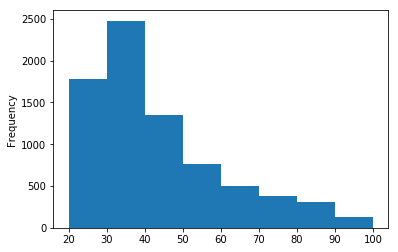

In [34]:
%matplotlib inline
blast_file_unique04.pident.plot(kind = "hist", bins = [20, 30, 40, 50, 60, 70, 80, 90, 100])

However, for the e-values the histogram doesn't look as nice, since the values are not evenly spread out over the different bins.

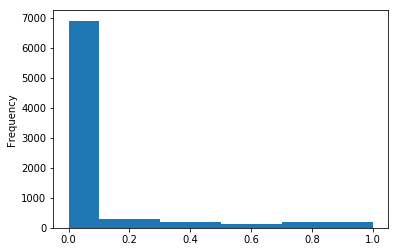

In [35]:
blast_file_unique04.evalue.plot(kind = "hist", bins = [0, 0.1, 0.3, 0.5, 0.7, 1])

A pie chart would be a better idea for the e-values (and possibly also for the percent identity values). However, to make a pie chart, the data needs to be in categories, ideally not more than 10 so it can be nicely displayed in a pie chart. So out of my many values in **pident** and **evalue** I need to make some kind of categories. 

Here, the command `.cut()` comes in very handy! It is used to bin values into concrete intervals.

So for the percent identity values, I want to create bins with interval 10, starting from 20 (since we don't have any entries with values below 20). I could create a new column in the dataframe that contains the new categories, but it's not necessary if I just want to visualise it. However, if I plan on using the categories further on, it might be useful to have that column.

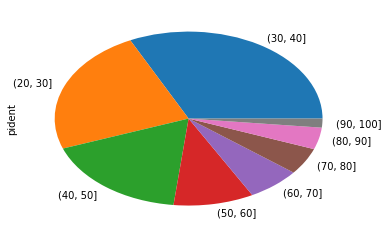

In [36]:
pd.cut(blast_file_unique04.pident, bins = [20, 30, 40, 50, 60, 70, 80, 90, 100]).value_counts().plot(kind ="pie")

So we see that for most Thielavia genes, a homologous gene in the swissprot database was found that had 20-50 percent identity, while only for a few genes homologues with more than 70% identity were found.

Now we can do the same thing for the e-values. Here I make more irregularly spaced bins:

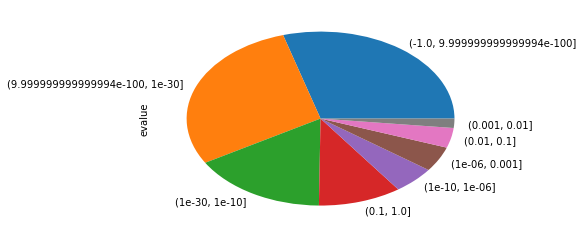

In [37]:
pd.cut(blast_file_unique04.evalue, bins =[-1, 1e-99, 1e-30, 1e-10, 1e-6, 1e-3, 1e-02, 1e-1, 1]).value_counts().plot(kind ="pie")

I don't like that 1e-99 is converted to 9.999999999999999994-100 in Python. To rename my categories, I do actually need the column in the dataframe, so let's create a new column for the bins of the e-values.

In [38]:
blast_file_unique04["ebins"] = pd.cut(blast_file_unique04.evalue, bins =[-1, 1e-99, 1e-30, 1e-10, 1e-6, 1e-3, 1e-02, 1e-1, 1])

In [39]:
blast_file_unique04.head()

,gene_name,gi,pident,evalue,description,ebins
4806,THTET00000001001,gi|182705235|sp|P00440.5|TYRO_NEUCR,64.731,0.0,RecName: Full=Tyrosinase; AltName: Full=Monoph...,"(-1.0, 9.999999999999994e-100]"
4460,THTET00000003617,gi|121788882|sp|Q2HAX7.1|ARGJ_CHAGB,88.273,0.0,RecName: Full=Arginine biosynthesis bifunction...,"(-1.0, 9.999999999999994e-100]"
928,THTET00000007441,gi|121932518|sp|Q2GUU0.1|YME2_CHAGB,74.797,0.0,RecName: Full=Mitochondrial escape protein 2; ...,"(-1.0, 9.999999999999994e-100]"
4464,THTET00000003733,gi|857217567|sp|G0SDP9.1|NU152_CHATD,51.457,0.0,RecName: Full=Nucleoporin NUP152; AltName: Ful...,"(-1.0, 9.999999999999994e-100]"
4475,THTET00000002722,gi|8134725|sp|Q9Y8H7.1|SPEE_NEUCR,87.671,0.0,RecName: Full=Spermidine synthase; Short=SPDSY...,"(-1.0, 9.999999999999994e-100]"


With `.cat.categories` I can check what the bins/categories are called and how many there are. Renaming them is easy. I just need to set the `.cat.categories` to a list of numbers or strings (same number as there are categories).

In [40]:
blast_file_unique04.ebins.cat.categories

IntervalIndex([(-1.0, 9.999999999999994e-100], (9.999999999999994e-100, 1e-30], (1e-30, 1e-10], (1e-10, 1e-06], (1e-06, 0.001], (0.001, 0.01], (0.01, 0.1], (0.1, 1.0]]
              closed='right',
              dtype='interval[float64]')

In [41]:
blast_file_unique04.ebins.cat.categories = ["0", "0 to 1e-30", "1e-30 to 1e-10", "1e-10 to 1e-6", "1e-6 to 1e-3", "1e-3 to 0.01", "0.01 to 0.1", "0.1 to 1"]

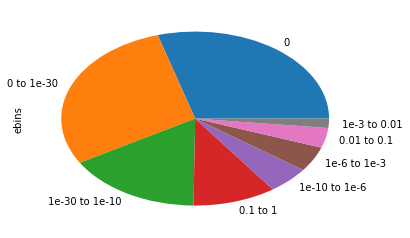

In [42]:
blast_file_unique04.ebins.value_counts().plot(kind = "pie")

Now the pie chart looks much better and the categories are easier to understand!

So now there is only one things left to do! I want to export the dataframe I created here (`blast_file_unique04`) as a csv and download it onto my computer. This is easily done with `.to_csv()`. I will specify again that the separator should be a semicolon, so I have no problems opening it on my Swedish computer. 

In [43]:
blast_file_unique04.to_csv("data/blast_unique04.csv", sep=";")